In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data


In [ ]:
!gdown "1kU64ckjel-CpAH352bwU5hWMFT_caZxZ"

Downloading...
From: https://drive.google.com/uc?id=1kU64ckjel-CpAH352bwU5hWMFT_caZxZ
To: /content/card_fraud_detection.zip
100% 69.2M/69.2M [00:01<00:00, 60.7MB/s]


In [ ]:
!unzip "/content/card_fraud_detection.zip"

Archive:  /content/card_fraud_detection.zip
  inflating: creditcard.csv          


In [ ]:
df = pd.read_csv("creditcard.csv")

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
data = df.to_numpy()
X, y = data[:, :-1].astype(np.float64), data[:, -1].astype(np.uint8)

# Add bias to X

In [ ]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

# One hot encoding

In [ ]:
n_classes = np.unique(y, axis=0).shape[0]
n_samples = y.shape[0]

y_encoded = np.zeros((n_samples, n_classes))
y_encoded[np.arange(n_samples), y] = 1

In [ ]:
y_encoded

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

# Train, val, test split (7:2:1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_b, y_encoded,
    test_size=0.3,
    random_state=2,
    shuffle=True
)

X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val,
    test_size=0.2,
    random_state=2,
    shuffle=True
)

In [ ]:
X_train

array([[ 1.00000000e+00,  1.99800000e+03, -1.49310940e+00, ...,
         3.26770921e-01, -1.22804435e-01,  5.99000000e+00],
       [ 1.00000000e+00,  1.65717000e+05,  1.88251154e+00, ...,
         4.90680715e-02, -3.78159017e-02,  1.20770000e+02],
       [ 1.00000000e+00,  7.22640000e+04, -2.61671428e+00, ...,
         4.75726733e-01, -1.53728174e-01,  1.79000000e+00],
       ...,
       [ 1.00000000e+00,  6.54800000e+04, -7.99005360e-01, ...,
        -2.14302693e-02,  5.02336253e-02,  7.54600000e+01],
       [ 1.00000000e+00,  1.34733000e+05,  2.01251198e+00, ...,
        -9.09007278e-03, -6.14920442e-02,  1.26200000e+01],
       [ 1.00000000e+00,  6.76540000e+04,  1.29285632e+00, ...,
         7.86617917e-02,  2.72844881e-02,  1.00000000e+00]])

# Standardization

In [ ]:
#@title Not normalize bias
scaler = StandardScaler()
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_val[:, 1:] = scaler.transform(X_val[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])

In [ ]:
X_train

array([[ 1.        , -1.95311891, -0.76256074, ...,  0.79907219,
        -0.37273829, -0.32754448],
       [ 1.        ,  1.49473018,  0.96434558, ...,  0.119096  ,
        -0.11391761,  0.13119296],
       [ 1.        , -0.4733483 , -1.33737659, ...,  1.16380164,
        -0.46691221, -0.34433048],
       ...,
       [ 1.        , -0.61621632, -0.40746973, ..., -0.05352446,
         0.15422491, -0.04989603],
       [ 1.        ,  0.84222097,  1.03085144, ..., -0.02330856,
        -0.18601998, -0.30104658],
       [ 1.        , -0.57043285,  0.66268869, ...,  0.19155844,
         0.08433652, -0.34748785]])

# Functions

In [ ]:
def softmax(z):
  exp_z = np.exp(z)
  return exp_z / exp_z.sum(axis=1)[:, None]

def predict(X, theta):
  z = np.dot(X, theta)
  y_hat = softmax(z)
  return y_hat

def compute_loss(y_hat, y):
  n = y.size
  return (-1/n)*np.sum(y*np.log(y_hat)) #hadamard product

def compute_gradients(X, y, y_hat):
  n = y.size
  return np.dot(X.T, (y_hat-y))/n

def update_theta(theta, gradients, lr):
  return theta - lr*gradients

def compute_accuracy(X, y, theta):
  y_hat = predict(X, theta)
  acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()
  return acc

# Initialize hyper parameters and thetas

In [ ]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]
np.random.seed(2)
theta = np.random.uniform(
    size=(n_features, n_classes)
)

# Training

In [ ]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
  train_batch_losses = []
  train_batch_accs = []
  val_batch_losses = []
  val_batch_accs = []

  for i in range(0, X_train.shape[0], batch_size):
    X_i = X_train[i:i+batch_size]
    y_i = y_train[i:i+batch_size]

    y_hat = predict(X_i, theta)
    train_loss = compute_loss(y_hat, y_i)
    gradients = compute_gradients(X_i, y_i, y_hat)
    theta = update_theta(theta, gradients, lr)

    train_batch_losses.append(train_loss)
    train_acc = compute_accuracy(X_train, y_train, theta)
    train_batch_accs.append(train_acc)
    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss)
    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

  train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
  val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
  train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
  val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

  train_losses.append(train_batch_loss)
  val_losses.append(val_batch_loss)
  train_accs.append(train_batch_acc)
  val_accs.append(val_batch_acc)

  print(f"\nEpoch {epoch + 1}: \tTraining loss {train_batch_loss:.3f}\tValidation loss {val_batch_loss:.3f}")


Epoch 1: 	Training loss 0.300	Validation loss 0.297

Epoch 2: 	Training loss 0.176	Validation loss 0.174

Epoch 3: 	Training loss 0.115	Validation loss 0.114

Epoch 4: 	Training loss 0.082	Validation loss 0.081

Epoch 5: 	Training loss 0.062	Validation loss 0.061

Epoch 6: 	Training loss 0.050	Validation loss 0.049

Epoch 7: 	Training loss 0.041	Validation loss 0.041

Epoch 8: 	Training loss 0.035	Validation loss 0.035

Epoch 9: 	Training loss 0.031	Validation loss 0.031

Epoch 10: 	Training loss 0.028	Validation loss 0.027

Epoch 11: 	Training loss 0.025	Validation loss 0.025

Epoch 12: 	Training loss 0.023	Validation loss 0.023

Epoch 13: 	Training loss 0.021	Validation loss 0.021

Epoch 14: 	Training loss 0.020	Validation loss 0.020

Epoch 15: 	Training loss 0.019	Validation loss 0.018

Epoch 16: 	Training loss 0.017	Validation loss 0.017

Epoch 17: 	Training loss 0.017	Validation loss 0.016

Epoch 18: 	Training loss 0.016	Validation loss 0.015

Epoch 19: 	Training loss 0.015	Valid

# Plot Loss and Accuracy

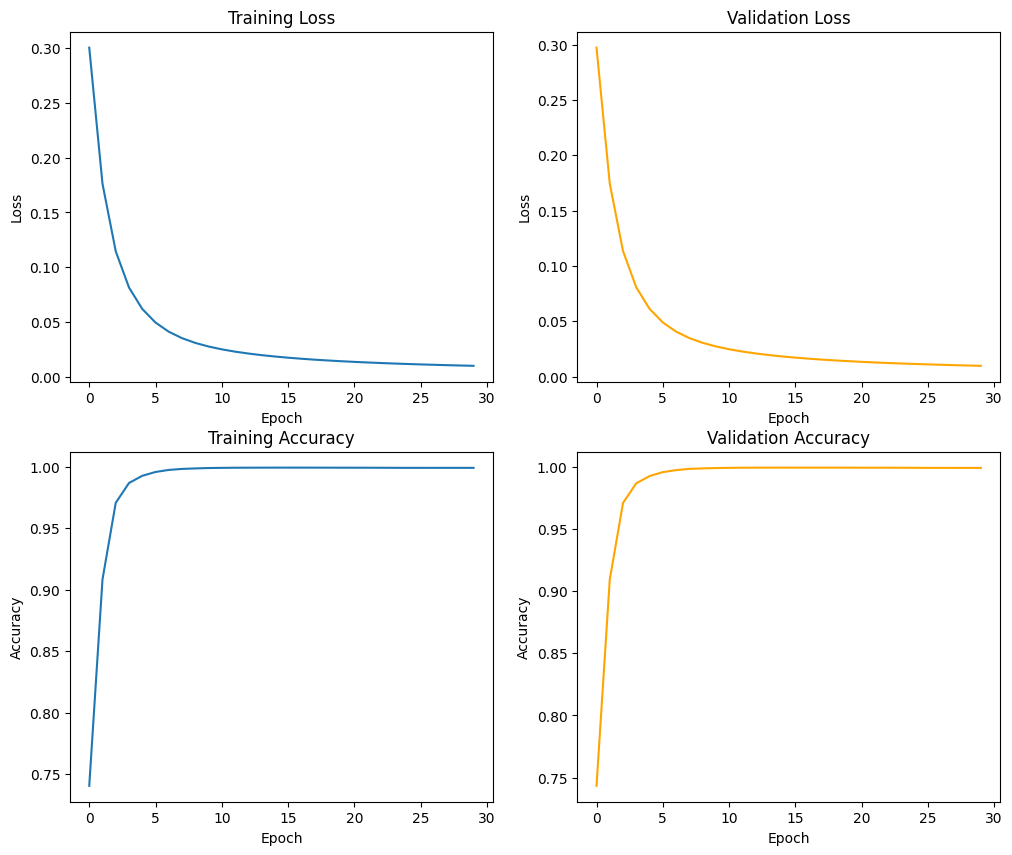

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

# Evaluation

In [ ]:
train_set_acc = compute_accuracy(X_train, y_train, theta)
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print(f"Accuracy on train set: {train_set_acc:.3f}")
print(f"Accuracy on validation set: {val_set_acc:.3f}")
print(f"Accuracy on test set: {test_set_acc:.3f}")

Accuracy on train set: 0.999
Accuracy on validation set: 0.999
Accuracy on test set: 0.999
